In [1]:
# IMPORTING MODULES
import glob
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
cvx_path = os.path.abspath(os.path.join('..', '..', 'cvxEDA', 'src'))
module_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(module_path)
import pandas as pd
import random
import scipy.signal as ss
import sys

import tools.data_reader_wesad as dr
import tools.display_tools as dt
import tools.preprocessing as preprocessing

from scipy.fft import fft, fftfreq, fftshift
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize

import cvxopt.solvers
cvxopt.solvers.options['show_progress'] = False

import warnings
warnings.filterwarnings(
    "ignore", 
    category=RuntimeWarning
)


phases = dr.Phases.PHASE_ORDER


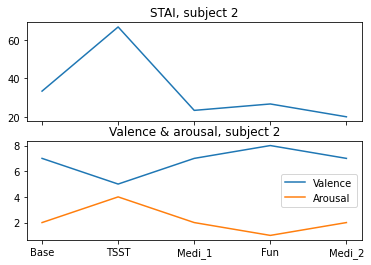

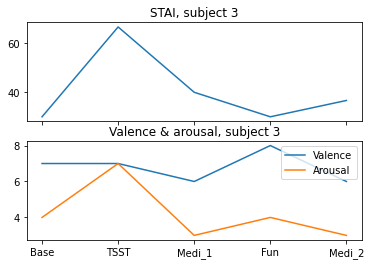

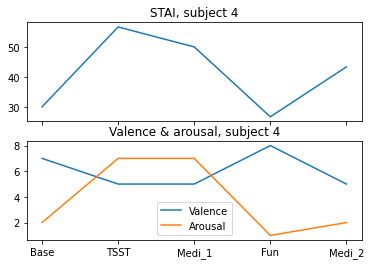

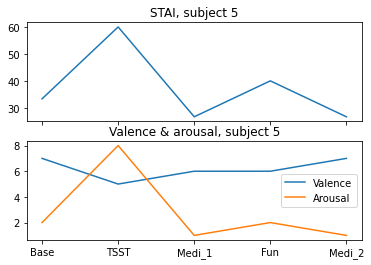

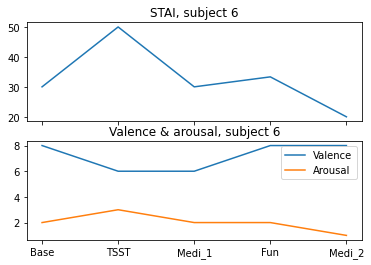

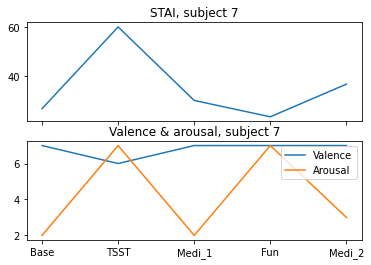

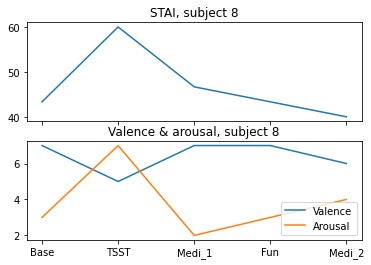

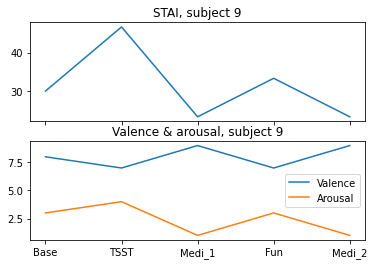

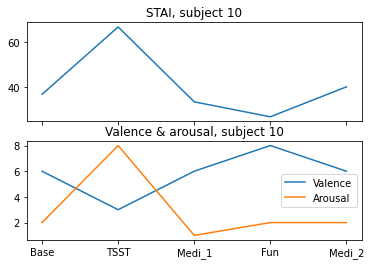

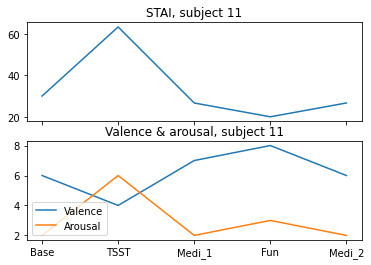

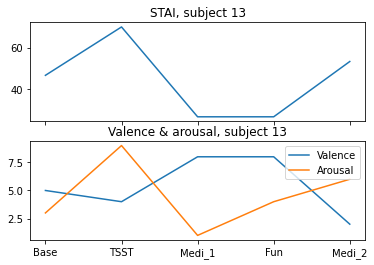

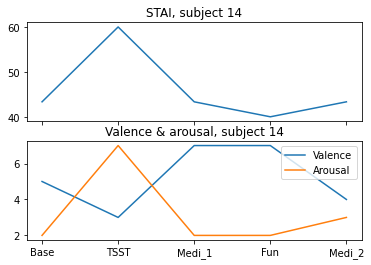

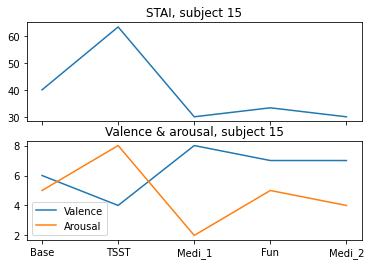

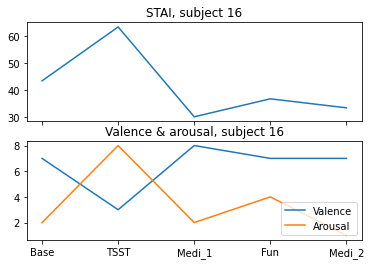

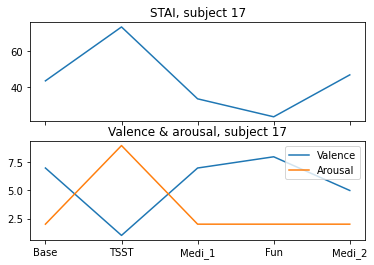

In [18]:
# VISUALIZE STAI LABELS
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

phases = dr.Phases.PHASE_ORDER

stai_scores = dr.get_stai_scores()
columns = stai_scores.columns

dim_scores_valence = dr.get_dim_scores(dim_type="valence")
dim_scores_arousal = dr.get_dim_scores(dim_type="arousal")

# print(stai_scores.head())
# print(dim_scores_valence.head())
# print(dim_scores_arousal.head())

for i in range(stai_scores.shape[0]):
    s = stai_scores.iloc[i, 0]
    stai = stai_scores.iloc[i, 1:]
    valence = dim_scores_valence.iloc[i, 1:]
    arousal = dim_scores_arousal.iloc[i, 1:]
    legend = ["STAI", "Valence", "Arousal"]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex="col")
    ax1.plot(stai)
    ax1.set_title(f"STAI, subject {s}")
    ax2.plot(valence)
    ax2.plot(arousal)
    ax2.set_title(f"Valence & arousal, subject {s}")
    ax2.legend(["Valence", "Arousal"])
